In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("hyperthyroidism3_FinalDataSet_April.csv", encoding='latin-1')
df.dropna(inplace=True)


In [3]:
df.head()

,aphp,nhph,tertiary_hp,secondary_hp,age,gender,height,weight,bmi,marital_status,...,nephrolithiasis,bone_specific_alp,corrected_calcium_by_albumin,serum_calcium_phosphorus_ratio,pf_index,alp_combined_with_cl_po4,third_surgery_pathology_report,fourth_surgery_pathology_report,triglycerides,hdl_cholesterol
0,0,0,0,0,0,-1,0,0,0.0,0,...,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,0,0,0,0,60,1,0,0,0.0,1,...,0,0.0,11.2,2.8,147.0,0.0,0,0,0,0
2,0,0,0,0,0,-1,0,0,0.0,0,...,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,0,0,0,0,0,-1,0,0,0.0,0,...,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4,1,0,0,0,55,1,170,73,0.0,1,...,0,0.0,12.1,4.4,413.0,0.0,0,0,0,0


In [4]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values  


## Splitting & Using NB


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)


import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB()

start_time = time.time()

gnb.fit(X_train, y_train)

end_time = time.time()

training_time = end_time - start_time

print(f"Training time: {training_time} seconds")



Training time: 0.0 seconds


## Using Evaluation Metrics

Accuracy =  85.33333333333334 %
Precision =  0.8579069352825816
Recall =  0.8633484162895928
F1-score =  0.8530982905982907


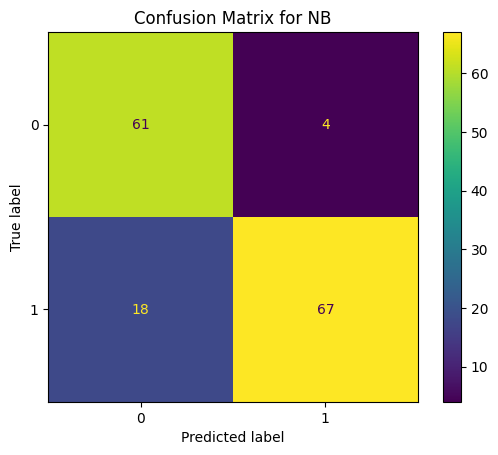

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        65
           1       0.94      0.79      0.86        85

    accuracy                           0.85       150
   macro avg       0.86      0.86      0.85       150
weighted avg       0.87      0.85      0.85       150



In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Calculating using average macro
print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred,average='macro'))
print("Recall = ", recall_score(y_test, y_pred,average='macro'))
print("F1-score = ", f1_score(y_test, y_pred,average='macro'))
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for NB')
plt.show()

# Using classification report too
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


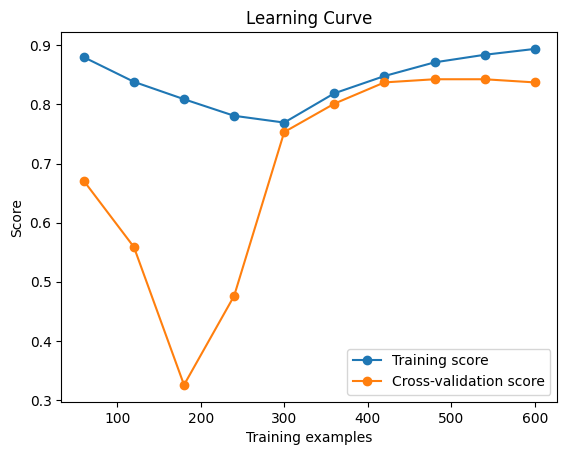

In [8]:
train_sizes, train_scores, test_scores = learning_curve(naive_bayes, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


--- Model Training (Gaussian Naive Bayes) ---
Training Wall Time: 0.0000 seconds
Training CPU Time (User): 0.0000 seconds
Training CPU Time (System): 0.0000 seconds
Memory RSS after training: 193.86 MB

--- Model Prediction (Gaussian Naive Bayes) ---
Prediction Wall Time (for 150 samples): 0.0000 seconds
Prediction CPU Time (User): 0.0000 seconds
Prediction CPU Time (System): 0.0000 seconds

--- Model Evaluation (Gaussian Naive Bayes) ---
Accuracy = 85.33 %
Precision (Macro) = 0.8579
Recall (Macro) = 0.8633
F1-score (Macro) = 0.8531

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        65
           1       0.94      0.79      0.86        85

    accuracy                           0.85       150
   macro avg       0.86      0.86      0.85       150
weighted avg       0.87      0.85      0.85       150


--- Model Complexity (Gaussian Naive Bayes) ---
Number of Features Seen: 70
Classes Learned: [0 1]
Number of

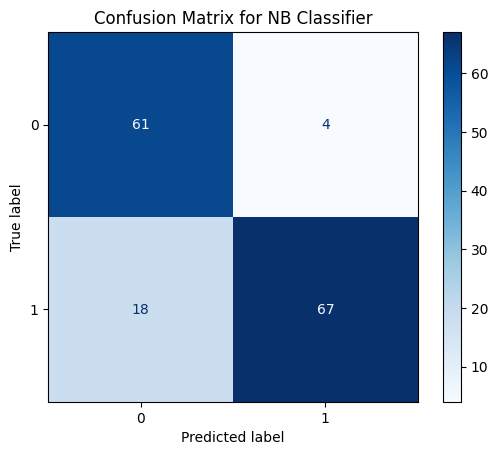


Displaying Learning Curve...


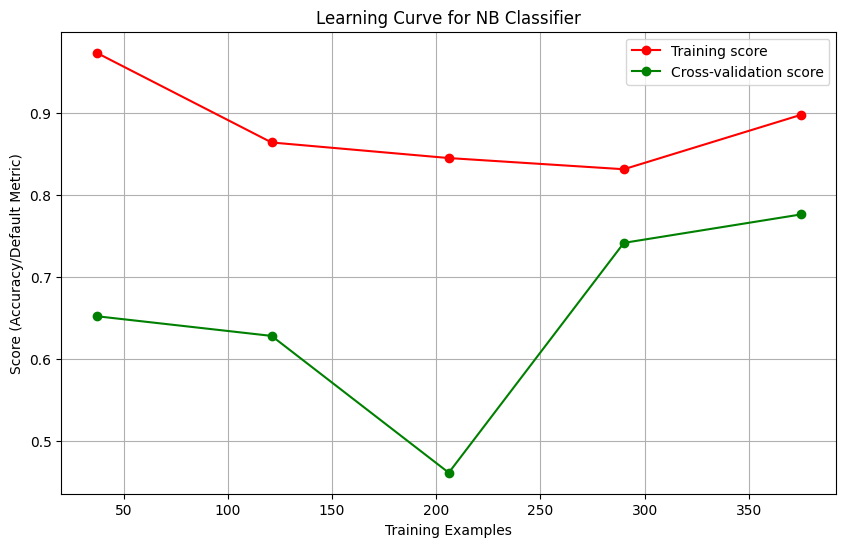


--- Generating Visualizations for Collected Metrics (Gaussian Naive Bayes) ---


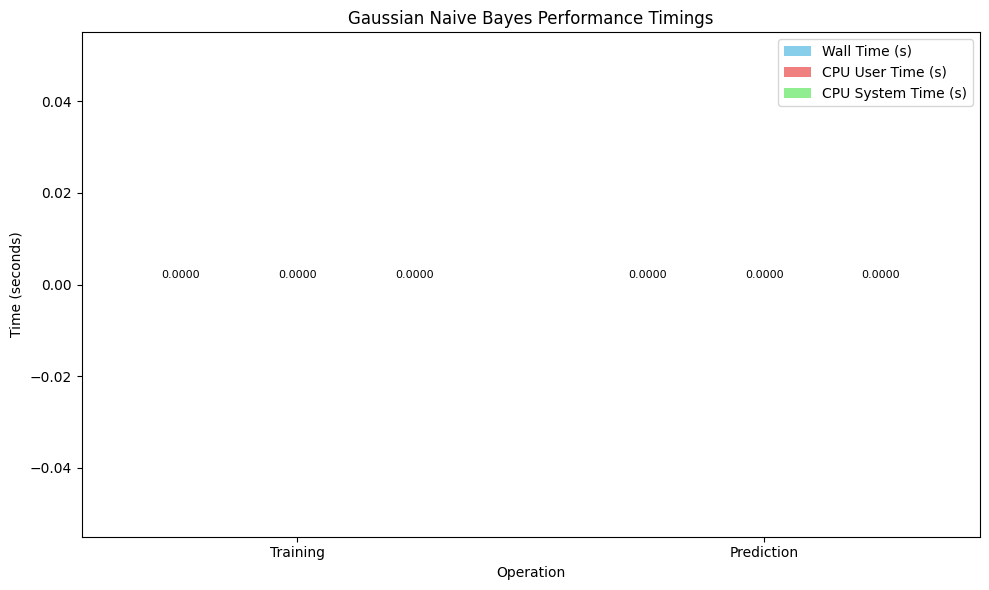

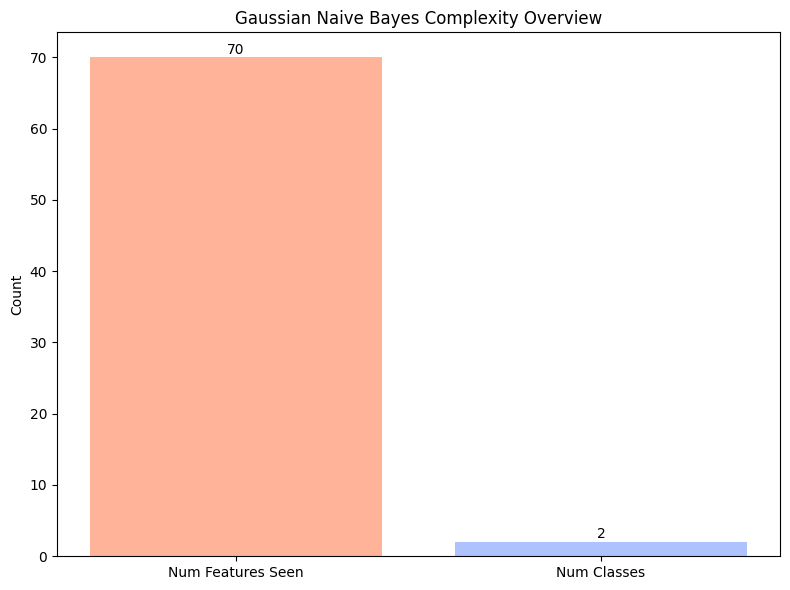

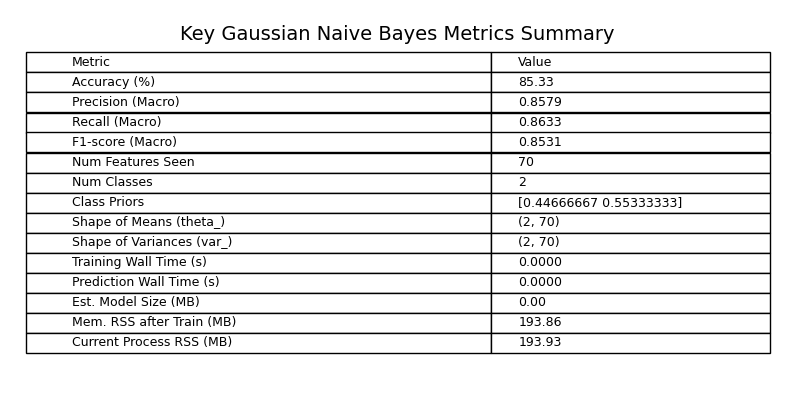


--- Analysis Complete ---


In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import warnings
import sys # For model object size

# Attempt to import psutil for CPU and memory stats
try:
    import psutil
    psutil_available = True
    process = psutil.Process() # Get current process
except ImportError:
    psutil_available = False
    print("psutil library not found. CPU and memory usage stats will not be available.")
    print("To install psutil, run: pip install psutil")

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.naive_bayes import GaussianNB # Import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

# --- 0. Initialize Metrics Storage ---
# Dictionary to store all metrics for later visualization
all_metrics = {}

# --- 1. Load Data ---
# !!! IMPORTANT: Make sure this path is correct for your system !!!
df = pd.read_csv(r"C:\Users\musab\desktop\ht\htOld\dataset\hyperthyroidism3_FinalDataSet_April.csv", encoding='latin-1')

df.dropna(inplace=True)

if df.empty:
    print("DataFrame is empty after dropping NaNs. Exiting.")
    sys.exit()

# Assuming the first column is the target and the rest are features
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Convert feature names to strings, handle potential non-string column names
feature_names = [str(col) for col in df.columns[1:]]
# Convert class names from y to strings (used for confusion matrix display_labels)
class_names = [str(cls) for cls in np.unique(y)]


# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Initialize Model ---
# Using GaussianNB as requested
naive_bayes_classifier = GaussianNB()

# --- 4. Train Model and Measure Resources ---
print("\n--- Model Training (Gaussian Naive Bayes) ---")
training_start_time_wall = time.time()
if psutil_available:
    cpu_times_before_train = process.cpu_times()
    mem_info_before_train = process.memory_info().rss

naive_bayes_classifier.fit(X_train, y_train)

training_end_time_wall = time.time()
if psutil_available:
    cpu_times_after_train = process.cpu_times()
    mem_info_after_train = process.memory_info().rss

all_metrics['training_wall_time'] = training_end_time_wall - training_start_time_wall
print(f"Training Wall Time: {all_metrics['training_wall_time']:.4f} seconds")

if psutil_available:
    all_metrics['training_cpu_time_user'] = cpu_times_after_train.user - cpu_times_before_train.user
    all_metrics['training_cpu_time_system'] = cpu_times_after_train.system - cpu_times_before_train.system
    all_metrics['memory_rss_after_training_mb'] = mem_info_after_train / (1024**2)
    print(f"Training CPU Time (User): {all_metrics['training_cpu_time_user']:.4f} seconds")
    print(f"Training CPU Time (System): {all_metrics['training_cpu_time_system']:.4f} seconds")
    print(f"Memory RSS after training: {all_metrics['memory_rss_after_training_mb']:.2f} MB")
else: # Default values if psutil not available
    all_metrics['training_cpu_time_user'] = 0
    all_metrics['training_cpu_time_system'] = 0
    all_metrics['memory_rss_after_training_mb'] = 0


# --- 5. Make Predictions and Measure Resources ---
print("\n--- Model Prediction (Gaussian Naive Bayes) ---")
prediction_start_time_wall = time.time()
if psutil_available:
    cpu_times_before_predict = process.cpu_times()

y_pred = naive_bayes_classifier.predict(X_test)

prediction_end_time_wall = time.time()
if psutil_available:
    cpu_times_after_predict = process.cpu_times()

all_metrics['prediction_wall_time'] = prediction_end_time_wall - prediction_start_time_wall
print(f"Prediction Wall Time (for {len(X_test)} samples): {all_metrics['prediction_wall_time']:.4f} seconds")

if psutil_available:
    all_metrics['prediction_cpu_time_user'] = cpu_times_after_predict.user - cpu_times_before_predict.user
    all_metrics['prediction_cpu_time_system'] = cpu_times_after_predict.system - cpu_times_before_predict.system
    print(f"Prediction CPU Time (User): {all_metrics['prediction_cpu_time_user']:.4f} seconds")
    print(f"Prediction CPU Time (System): {all_metrics['prediction_cpu_time_system']:.4f} seconds")
else: # Default values
    all_metrics['prediction_cpu_time_user'] = 0
    all_metrics['prediction_cpu_time_system'] = 0

# --- 6. Evaluate Model ---
print("\n--- Model Evaluation (Gaussian Naive Bayes) ---")
all_metrics['accuracy'] = accuracy_score(y_test, y_pred) * 100
all_metrics['precision_macro'] = precision_score(y_test, y_pred, average='macro', zero_division=0)
all_metrics['recall_macro'] = recall_score(y_test, y_pred, average='macro', zero_division=0)
all_metrics['f1_score_macro'] = f1_score(y_test, y_pred, average='macro', zero_division=0)

print(f"Accuracy = {all_metrics['accuracy']:.2f} %")
print(f"Precision (Macro) = {all_metrics['precision_macro']:.4f}")
print(f"Recall (Macro) = {all_metrics['recall_macro']:.4f}")
print(f"F1-score (Macro) = {all_metrics['f1_score_macro']:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# --- 7. Model Complexity Statistics ---
print("\n--- Model Complexity (Gaussian Naive Bayes) ---")
if hasattr(naive_bayes_classifier, 'n_features_in_'):
    all_metrics['n_features_in'] = naive_bayes_classifier.n_features_in_
    print(f"Number of Features Seen: {all_metrics['n_features_in']}")
else:
    all_metrics['n_features_in'] = 'N/A'
    print("Number of Features Seen: N/A (attribute n_features_in_ not found)")

if hasattr(naive_bayes_classifier, 'classes_'):
    all_metrics['classes'] = naive_bayes_classifier.classes_
    all_metrics['n_classes'] = len(naive_bayes_classifier.classes_)
    print(f"Classes Learned: {all_metrics['classes']}")
    print(f"Number of Classes: {all_metrics['n_classes']}")
else:
    all_metrics['classes'] = 'N/A'
    all_metrics['n_classes'] = 'N/A'
    print("Classes Learned: N/A")

if hasattr(naive_bayes_classifier, 'class_prior_'):
    all_metrics['class_prior'] = naive_bayes_classifier.class_prior_
    print(f"Class Priors: {all_metrics['class_prior']}")
else:
    all_metrics['class_prior'] = 'N/A'
    print("Class Priors: N/A")

if hasattr(naive_bayes_classifier, 'theta_'): # Means
    all_metrics['theta_shape'] = naive_bayes_classifier.theta_.shape
    print(f"Shape of Learned Means (theta_): {all_metrics['theta_shape']}")
else:
    all_metrics['theta_shape'] = 'N/A'
    print("Shape of Learned Means (theta_): N/A")

if hasattr(naive_bayes_classifier, 'var_'): # Variances (newer versions)
    all_metrics['var_shape'] = naive_bayes_classifier.var_.shape
    print(f"Shape of Learned Variances (var_): {all_metrics['var_shape']}")
elif hasattr(naive_bayes_classifier, 'sigma_'): # Variances (older versions)
    all_metrics['var_shape'] = naive_bayes_classifier.sigma_.shape # Store as var_shape for consistency
    print(f"Shape of Learned Variances (sigma_): {all_metrics['var_shape']}")
else:
    all_metrics['var_shape'] = 'N/A'
    print("Shape of Learned Variances (var_ or sigma_): N/A")


# Estimating model size
model_size_bytes = sys.getsizeof(naive_bayes_classifier)
# Add sizes of significant numpy arrays if they exist
for attr_name in ['classes_', 'class_prior_', 'theta_', 'var_', 'sigma_']:
    if hasattr(naive_bayes_classifier, attr_name):
        attr = getattr(naive_bayes_classifier, attr_name)
        if isinstance(attr, np.ndarray):
            model_size_bytes += attr.nbytes # More accurate for numpy arrays

all_metrics['estimated_model_size_kb'] = model_size_bytes / 1024
all_metrics['estimated_model_size_mb'] = model_size_bytes / (1024**2)
print(f"Estimated Model Object Size in Memory: {all_metrics['estimated_model_size_kb']:.2f} KB ({all_metrics['estimated_model_size_mb']:.2f} MB)")

if psutil_available:
    all_metrics['current_process_rss_mb'] = process.memory_info().rss / (1024**2)
    all_metrics['current_process_vms_mb'] = process.memory_info().vms / (1024**2)
    print(f"Current Process RSS Memory: {all_metrics['current_process_rss_mb']:.2f} MB")
    print(f"Current Process VMS Memory: {all_metrics['current_process_vms_mb']:.2f} MB")
else:
    all_metrics['current_process_rss_mb'] = 0
    all_metrics['current_process_vms_mb'] = 0

# --- 8. Visualizations (From User's Script and Adapted) ---

# Confusion Matrix
print("\nDisplaying Confusion Matrix...")
try:
    if len(y_test) > 0 and len(y_pred) > 0:
        # Ensure display_labels covers all labels present in y_test and y_pred
        # and uses the stringified class_names learned by the model if available
        unique_labels_pred_test = np.unique(np.concatenate((y_test, y_pred)))
        display_labels_cm = [str(cls) for cls in np.unique(y)] # Default to all unique labels in y

        if hasattr(naive_bayes_classifier, 'classes_'):
             # Prefer actual classes from the model if available
            model_class_labels = [str(cls) for cls in naive_bayes_classifier.classes_]
            # Ensure all predicted/test labels are covered, using model's order if possible
            combined_labels = sorted(list(set(model_class_labels) | set(map(str,unique_labels_pred_test))))
            display_labels_cm = combined_labels


        conf_matrix = confusion_matrix(y_test, y_pred, labels=naive_bayes_classifier.classes_ if hasattr(naive_bayes_classifier, 'classes_') else None)
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=display_labels_cm)
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix for NB Classifier') # NB for Naive Bayes
        plt.show()
    else:
        print("Skipping Confusion Matrix: y_test or y_pred is empty.")
except Exception as e:
    print(f"Could not plot Confusion Matrix: {e}")


# Learning Curve
print("\nDisplaying Learning Curve...")
try:
    if len(y) >= 5 : # cv=5
        n_splits_cv = min(5, len(np.unique(y)))
        if n_splits_cv < 2 :
            print(f"Skipping Learning Curve: Not enough unique classes in target variable for {n_splits_cv} splits (min 2 required).")
        else:
            train_sizes, train_scores, test_scores = learning_curve(
                naive_bayes_classifier, X, y, cv=n_splits_cv,
                n_jobs=-1,
                train_sizes=np.linspace(0.1, 1.0, 5) # Reduced points for faster plotting
            )
            plt.figure(figsize=(10, 6))
            plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
            plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
            plt.xlabel("Training Examples")
            plt.ylabel("Score (Accuracy/Default Metric)")
            plt.title("Learning Curve for NB Classifier")
            plt.legend(loc="best")
            plt.grid(True)
            plt.show()
    else:
        print("Skipping Learning Curve: Not enough samples in X or y for cross-validation (min 5 samples required for cv=5).")
except Exception as e:
    print(f"Could not plot Learning Curve: {e}")


# --- 9. New Visualizations for Collected Metrics (Adapted for Gaussian Naive Bayes) ---
print("\n--- Generating Visualizations for Collected Metrics (Gaussian Naive Bayes) ---")

# Plot 1: Performance Timings (Same as before)
fig_perf_gnb, ax_perf_gnb = plt.subplots(figsize=(10, 6))
time_categories = ['Training', 'Prediction']
wall_times = [all_metrics.get('training_wall_time', 0), all_metrics.get('prediction_wall_time', 0)]
cpu_user_times = [all_metrics.get('training_cpu_time_user', 0), all_metrics.get('prediction_cpu_time_user', 0)]
cpu_system_times = [all_metrics.get('training_cpu_time_system', 0), all_metrics.get('prediction_cpu_time_system', 0)]

bar_width = 0.25
index = np.arange(len(time_categories))

bar1 = ax_perf_gnb.bar(index - bar_width, wall_times, bar_width, label='Wall Time (s)', color='skyblue')
bar2 = ax_perf_gnb.bar(index, cpu_user_times, bar_width, label='CPU User Time (s)', color='lightcoral')
bar3 = ax_perf_gnb.bar(index + bar_width, cpu_system_times, bar_width, label='CPU System Time (s)', color='lightgreen')

ax_perf_gnb.set_xlabel('Operation')
ax_perf_gnb.set_ylabel('Time (seconds)')
ax_perf_gnb.set_title('Gaussian Naive Bayes Performance Timings')
ax_perf_gnb.set_xticks(index)
ax_perf_gnb.set_xticklabels(time_categories)
ax_perf_gnb.legend()
for bar_group in [bar1, bar2, bar3]: # Add value labels
    for bar in bar_group:
        yval = bar.get_height()
        offset_factor = 0.001 * (max(wall_times + cpu_user_times + cpu_system_times) if any(wall_times + cpu_user_times + cpu_system_times) else 1)
        ax_perf_gnb.text(bar.get_x() + bar.get_width()/2.0, yval + offset_factor, f'{yval:.4f}', ha='center', va='bottom', fontsize=8)
fig_perf_gnb.tight_layout()
plt.show()


# Plot 2: Model Complexity for Gaussian Naive Bayes
fig_comp_gnb, ax_comp_gnb = plt.subplots(figsize=(8, 6))
complexity_metrics_names_gnb = ['Num Features Seen', 'Num Classes']
complexity_values_gnb = [
    all_metrics.get('n_features_in', 0) if isinstance(all_metrics.get('n_features_in'), (int, float)) else 0,
    all_metrics.get('n_classes', 0) if isinstance(all_metrics.get('n_classes'), (int, float)) else 0
]
colors_gnb = ['#FFB399', '#ADC2FF']

bars_comp_gnb = ax_comp_gnb.bar(complexity_metrics_names_gnb, complexity_values_gnb, color=colors_gnb)
ax_comp_gnb.set_ylabel('Count')
ax_comp_gnb.set_title('Gaussian Naive Bayes Complexity Overview')
for bar in bars_comp_gnb: # Add value labels
    yval = bar.get_height()
    ax_comp_gnb.text(bar.get_x() + bar.get_width()/2.0, yval + 0.1 , f'{int(yval)}', ha='center', va='bottom')
fig_comp_gnb.tight_layout()
plt.show()


# Plot 3: Summary Table of Key Metrics for Gaussian Naive Bayes
fig_table_gnb, ax_table_gnb = plt.subplots(figsize=(10, 5)) # Adjusted size
ax_table_gnb.axis('tight')
ax_table_gnb.axis('off')

table_data_gnb = [
    ["Metric", "Value"],
    ["Accuracy (%)", f"{all_metrics.get('accuracy', 0):.2f}"],
    ["Precision (Macro)", f"{all_metrics.get('precision_macro', 0):.4f}"],
    ["Recall (Macro)", f"{all_metrics.get('recall_macro', 0):.4f}"],
    ["F1-score (Macro)", f"{all_metrics.get('f1_score_macro', 0):.4f}"],
    ["Num Features Seen", f"{all_metrics.get('n_features_in', 'N/A')}"],
    ["Num Classes", f"{all_metrics.get('n_classes', 'N/A')}"],
    ["Class Priors", f"{all_metrics.get('class_prior', 'N/A')}"],
    ["Shape of Means (theta_)", f"{str(all_metrics.get('theta_shape', 'N/A'))}"],
    ["Shape of Variances (var_)", f"{str(all_metrics.get('var_shape', 'N/A'))}"],
    ["Training Wall Time (s)", f"{all_metrics.get('training_wall_time', 0):.4f}"],
    ["Prediction Wall Time (s)", f"{all_metrics.get('prediction_wall_time', 0):.4f}"],
    ["Est. Model Size (MB)", f"{all_metrics.get('estimated_model_size_mb', 0):.2f}"],
    ["Mem. RSS after Train (MB)", f"{all_metrics.get('memory_rss_after_training_mb', 0):.2f}"],
]
if psutil_available:
     table_data_gnb.extend([
        ["Current Process RSS (MB)", f"{all_metrics.get('current_process_rss_mb', 0):.2f}"],
     ])

table_gnb = ax_table_gnb.table(cellText=table_data_gnb, colLabels=None, cellLoc='left', loc='center', colWidths=[0.5, 0.3]) # Adjusted colWidths
table_gnb.auto_set_font_size(False)
table_gnb.set_fontsize(9)
table_gnb.scale(1.2, 1.2)
ax_table_gnb.set_title('Key Gaussian Naive Bayes Metrics Summary', fontsize=14, y=0.9) # Adjusted title position
plt.show()

print("\n--- Analysis Complete ---")
